In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("../data/curated/Combined Data.csv")
coast = pd.read_csv("../data/curated/vic_beach_proximity.csv")
schools = pd.read_csv("../data/curated/schools_by_SAL.csv")

In [3]:
# get years from 2016-2023
data_train = data[data['year'] != 2024]
# Perform an inner merge between data and schools on SAL_CODE
data_train = pd.merge(data_train, schools, on='SAL_CODE', how='inner')
data_train = pd.merge(data_train, coast, on='SAL_CODE', how='inner')

In [4]:
data_train[data_train['SAL_suburb'] == "Dandenong South"]['average_weekly_rent']

2920    318.75
2921    332.50
2922    344.00
2923    350.00
2924    350.00
2925    350.00
2926    359.25
2927    393.75
Name: average_weekly_rent, dtype: float64

In [5]:
data_train['Average_num_psns_per_bedroom']

0       0.90
1       0.88
2       0.86
3       0.84
4       0.82
        ... 
3419    0.84
3420    0.82
3421    0.80
3422    0.78
3423    0.76
Name: Average_num_psns_per_bedroom, Length: 3424, dtype: float64

In [6]:
data_train.shape

(3424, 68)

In [7]:
to_exclude = pd.read_csv('../data/landing/filtered_sal_codes.csv')

to_exclude = list(to_exclude['SAL_CODE'])

In [8]:
data_train.shape

(3424, 68)

In [9]:
excluded = ['Ravenhall','Quandong', 'Somerton','Tottenham','Dandenong South']

# also exclude any airport
data_train = data_train[~data_train['SAL_suburb'].str.contains('Airport')]

data_train = data_train[~data_train['SAL_CODE'].isin(to_exclude)]

In [10]:
data_train.shape

(2976, 68)

In [11]:
(3424 - 2912) / 4

128.0

In [12]:
data_train = data_train[data_train['SAL_suburb'].isin(excluded) == False]

In [13]:
data_train.columns

Index(['Suburb Cluster', 'SAL_suburb', 'SAL_CODE', 'Suburb Group',
       'AREASQKM21', 'station_count_in_suburb', 'closest_stations',
       'closest_station_1_STOP_NAME', 'closest_station_1_LATITUDE',
       'closest_station_1_LONGITUDE', 'closest_station_2_STOP_NAME',
       'closest_station_2_LATITUDE', 'closest_station_2_LONGITUDE',
       'suburb_centre_latitude', 'suburb_centre_longitude', 'distance_to_CBD',
       'time_to_CBD', 'distance_to_station', 'time_to_station', 'Cemeteries',
       'Civic squares and promenades', 'Conservation reserves',
       'Government schools', 'Natural and semi-natural open space',
       'Non-government schools', 'Parks and gardens',
       'Public housing reserves', 'Recreation corridor',
       'Services and utilities reserves',
       'Sportsfields and organised recreation', 'Tertiary institutions',
       'Transport reservations', 'year', 'A Crimes against the person',
       'Average_household_size', 'Average_num_psns_per_bedroom',
       '

In [14]:
# get top 15 rental values 
data_train.sort_values(by='average_weekly_rent', ascending=False).head(15)



,Suburb Cluster,SAL_suburb,SAL_CODE,Suburb Group,AREASQKM21,station_count_in_suburb,closest_stations,closest_station_1_STOP_NAME,closest_station_1_LATITUDE,closest_station_1_LONGITUDE,...,residential,shopping,internet_speed_test_count,inflation,2024_average_baths,2024_average_parking,2024_property_count,median_score,average_price,proximity_to_beach
3191,Southern Melbourne,Brighton East,20338,Brighton East,5.6665,0.0,"[{'STOP_NAME': 'North Brighton', 'LATITUDE': -...",North Brighton,-37.904887,145.002605,...,34.0,3.0,2571.0,7.0,NaN,NaN,NaN,31.730000,20529.000000,0.028061
3183,Southern Melbourne,Brighton,20337,Brighton,8.3701,4.0,"[{'STOP_NAME': 'Middle Brighton', 'LATITUDE': ...",Middle Brighton,-37.915134,144.996299,...,64.0,55.0,2486.0,7.0,NaN,NaN,NaN,34.213333,26083.500000,0.010829
3190,Southern Melbourne,Brighton East,20338,Brighton East,5.6665,0.0,"[{'STOP_NAME': 'North Brighton', 'LATITUDE': -...",North Brighton,-37.904887,145.002605,...,15.0,2.0,3125.0,5.1,NaN,NaN,NaN,31.730000,20529.000000,0.028061
3188,Southern Melbourne,Brighton East,20338,Brighton East,5.6665,0.0,"[{'STOP_NAME': 'North Brighton', 'LATITUDE': -...",North Brighton,-37.904887,145.002605,...,15.0,2.0,2121.0,2.2,NaN,NaN,NaN,31.730000,20529.000000,0.028061
3189,Southern Melbourne,Brighton East,20338,Brighton East,5.6665,0.0,"[{'STOP_NAME': 'North Brighton', 'LATITUDE': -...",North Brighton,-37.904887,145.002605,...,15.0,2.0,2740.0,1.1,NaN,NaN,NaN,31.730000,20529.000000,0.028061
3187,Southern Melbourne,Brighton East,20338,Brighton East,5.6665,0.0,"[{'STOP_NAME': 'North Brighton', 'LATITUDE': -...",North Brighton,-37.904887,145.002605,...,12.0,2.0,4641.0,1.3,NaN,NaN,NaN,31.730000,20529.000000,0.028061
3186,Southern Melbourne,Brighton East,20338,Brighton East,5.6665,0.0,"[{'STOP_NAME': 'North Brighton', 'LATITUDE': -...",North Brighton,-37.904887,145.002605,...,12.0,2.0,NaN,1.9,NaN,NaN,NaN,31.730000,20529.000000,0.028061
3180,Southern Melbourne,Brighton,20337,Brighton,8.3701,4.0,"[{'STOP_NAME': 'Middle Brighton', 'LATITUDE': ...",Middle Brighton,-37.915134,144.996299,...,36.0,19.0,2576.0,2.2,NaN,NaN,NaN,34.213333,26083.500000,0.010829
3182,Southern Melbourne,Brighton,20337,Brighton,8.3701,4.0,"[{'STOP_NAME': 'Middle Brighton', 'LATITUDE': ...",Middle Brighton,-37.915134,144.996299,...,36.0,19.0,3219.0,5.1,NaN,NaN,NaN,34.213333,26083.500000,0.010829
3135,Southern Melbourne,Beaumaris,20182,Hampton-Beaumaris,5.1806,0.0,"[{'STOP_NAME': 'Cheltenham', 'LATITUDE': -37.9...",Cheltenham,-37.966650,145.054558,...,122.0,4.0,1243.0,7.0,NaN,NaN,NaN,28.728644,5461.359335,0.010253


In [15]:
cols = ['distance_to_CBD', 'time_to_CBD','distance_to_station', 'time_to_station', 'Cemeteries',
       'Civic squares and promenades', 'Conservation reserves',
       'Government schools', 'Natural and semi-natural open space',
       'Non-government schools', 'Parks and gardens',
       'Public housing reserves', 'Recreation corridor',
       'Services and utilities reserves',
       'Sportsfields and organised recreation', 'Tertiary institutions',
       'Transport reservations', 'year', 'A Crimes against the person',
       'Average_household_size', 'Average_num_psns_per_bedroom',
       'B Property and deception offences', 'C Drug offences',
       'D Public order and security offences', 'E Justice procedures offences',
       'F Other offences', 'Median_age_persons', 'Median_tot_fam_inc_weekly',
       'Median_tot_hhd_inc_weekly', 'Median_tot_prsnl_inc_weekly', 'Tot_P_P',
       'Total_dwelings', 'average_quarterly_count', 'average_weekly_rent',
       'avg_d_mbps_wt', 'commercial', 'education', 'food_establishments',
       'healthcare', 'industrial', 'public_transport', 'recreation',
       'residential', 'shopping', 'internet_speed_test_count', 'inflation',"SAL_CODE", "median_score", 'average_price',"proximity_to_beach"]

data_train = data_train[cols]

In [16]:
years_interest = list(range(2016, 2030))
interest_rates = [
    1.75,  # 2016
    1.50,  # 2017
    1.50,  # 2018
    1.50,  # 2019
    0.25,  # 2020 (COVID-19 impact, very low rates)
    0.10,  # 2021 (near-zero rates)
    0.35,  # 2022 (start of increase)
    3.10,  # 2023 (rise due to inflation concerns)
    4.00,  # 2024 (projection)
    3.75,  # 2025 (projection)
    3.50,  # 2026 (projection)
    3.25,  # 2027 (projection)
    3.00,  # 2028 (projection)
    2.75   # 2029 (projection)
]

# Creating a DataFrame
interest_rate_table = pd.DataFrame({
    "Year": years_interest,
    "Projected Interest Rate (%)": interest_rates
})

# create df with years and gdp growth rate
gdp_df = pd.DataFrame({
    'year': range(2016, 2030),
    'interest_rate': interest_rates
})

# Merge the GDP growth rate data with the main dataframe on the 'year' column
data_train = pd.merge(data_train, gdp_df, on='year', how='left')

In [17]:
import pandas as pd

# Assuming your DataFrame is called df
# First, ensure that your DataFrame is sorted by 'year'
df = data_train
df = df.sort_values('year')

# Convert 'inflation' rates from percentages to decimals
df['inflation_decimal'] = df['inflation'] / 100

# Create a DataFrame containing all years from 2016 to the maximum year in your data
years = pd.DataFrame({'year': range(2016, df['year'].max() + 1)})

# Merge with the inflation data to ensure all years are included
inflation_data = pd.merge(years, df[['year', 'inflation_decimal']].drop_duplicates(), on='year', how='left')

# Forward-fill any missing inflation rates (if any years are missing)
inflation_data['inflation_decimal'] = inflation_data['inflation_decimal'].fillna(method='ffill')

# Calculate the cumulative inflation factor from 2016 to each year
inflation_data['cumulative_inflation_factor'] = (1 + inflation_data['inflation_decimal']).cumprod()

# Create a dictionary to map years to cumulative inflation factors
cumulative_inflation_dict = inflation_data.set_index('year')['cumulative_inflation_factor'].to_dict()

# Map the cumulative inflation factors back to the original DataFrame
df['cumulative_inflation_factor'] = df['year'].map(cumulative_inflation_dict)


# Update the 'inflation' column to reflect the cumulative effect from 2016
df['inflation'] = df['cumulative_inflation_factor']

# Drop the temporary columns if you no longer need them
df = df.drop(columns=['inflation_decimal', 'cumulative_inflation_factor'])


In [18]:
import matplotlib.pyplot as plt

In [19]:
# combine inflation and gdp growth rate per year:
# Merge the GDP growth rate data with the main dataframe on the 'year' column
inflation_data = pd.merge(inflation_data, gdp_df, on='year', how='left')
inflation_data

,year,inflation_decimal,cumulative_inflation_factor,interest_rate
0,2016,0.013,1.013000,1.75
1,2017,0.021,1.034273,1.50
2,2018,0.019,1.053924,1.50
3,2019,0.013,1.067625,1.50
4,2020,0.022,1.091113,0.25
5,2021,0.011,1.103115,0.10
6,2022,0.051,1.159374,0.35
7,2023,0.070,1.240530,3.10


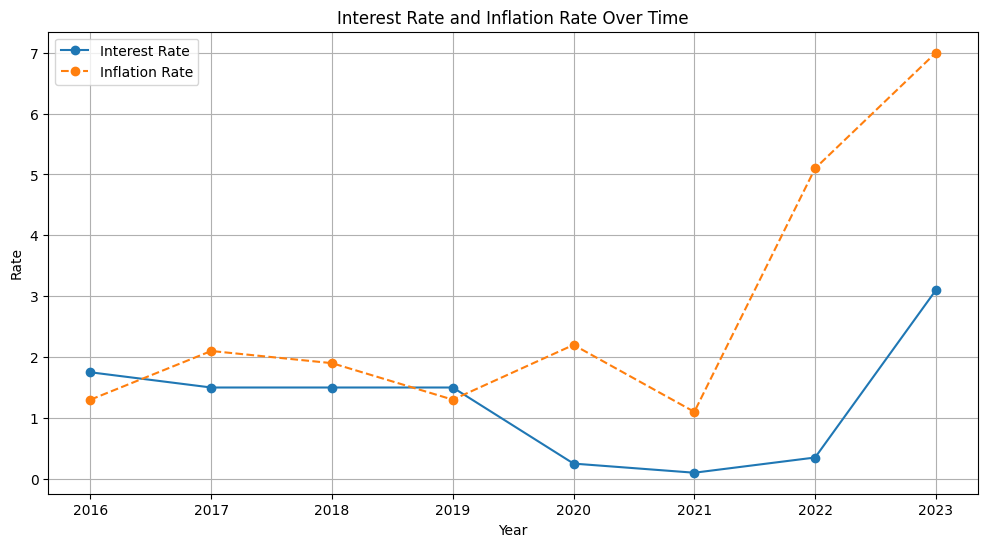

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(inflation_data['year'], inflation_data['interest_rate'], marker='o', label='Interest Rate')
plt.plot(inflation_data['year'], inflation_data['inflation_decimal'] * 100, marker='o', label='Inflation Rate', linestyle='--')
plt.title('Interest Rate and Inflation Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Rate')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
# inflation affected columns
inflation_affected_cols = ['average_weekly_rent', 'Median_tot_fam_inc_weekly', 'Median_tot_hhd_inc_weekly', 'Median_tot_prsnl_inc_weekly']

# Apply inflation adjustment to the affected columns
for col in inflation_affected_cols:
    df[col + '/inflation'] = df[col] / df['inflation']

    df.drop(columns=[col], inplace=True)

In [22]:
df.drop(columns=['inflation'], inplace=True)

In [23]:
# divide by average_household_size to get 'per person' rent
df['average_weekly_rent/inflation/household_size'] = df['average_weekly_rent/inflation'] / df['Average_household_size']
df.drop(columns=['average_weekly_rent/inflation'], inplace=True)

In [24]:
#df.drop(columns=['Average_household_size'], inplace=True)

In [25]:
import numpy as np

In [26]:
# get crime rate per person
crime_cols = ['A Crimes against the person', 'B Property and deception offences', 'C Drug offences', 'D Public order and security offences', 'E Justice procedures offences', 'F Other offences']

for col in crime_cols:
    df[col + '/per_person'] = df[col] / df['Tot_P_P']

    df.drop(columns=[col], inplace=True)

In [27]:
# log data for every column but average weekly rent
for col in df.columns:
    if col not in ['average_weekly_rent/inflation/household_size', 'SAL_CODE', 'year', 'interest_rate']:
        df[col] = df[col].apply(lambda x: np.log(x + 1))

In [28]:
target = 'average_weekly_rent/inflation/household_size'

In [29]:
df.columns

Index(['distance_to_CBD', 'time_to_CBD', 'distance_to_station',
       'time_to_station', 'Cemeteries', 'Civic squares and promenades',
       'Conservation reserves', 'Government schools',
       'Natural and semi-natural open space', 'Non-government schools',
       'Parks and gardens', 'Public housing reserves', 'Recreation corridor',
       'Services and utilities reserves',
       'Sportsfields and organised recreation', 'Tertiary institutions',
       'Transport reservations', 'year', 'Average_household_size',
       'Average_num_psns_per_bedroom', 'Median_age_persons', 'Tot_P_P',
       'Total_dwelings', 'average_quarterly_count', 'avg_d_mbps_wt',
       'commercial', 'education', 'food_establishments', 'healthcare',
       'industrial', 'public_transport', 'recreation', 'residential',
       'shopping', 'internet_speed_test_count', 'SAL_CODE', 'median_score',
       'average_price', 'proximity_to_beach', 'interest_rate',
       'Median_tot_fam_inc_weekly/inflation',
       'Med

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

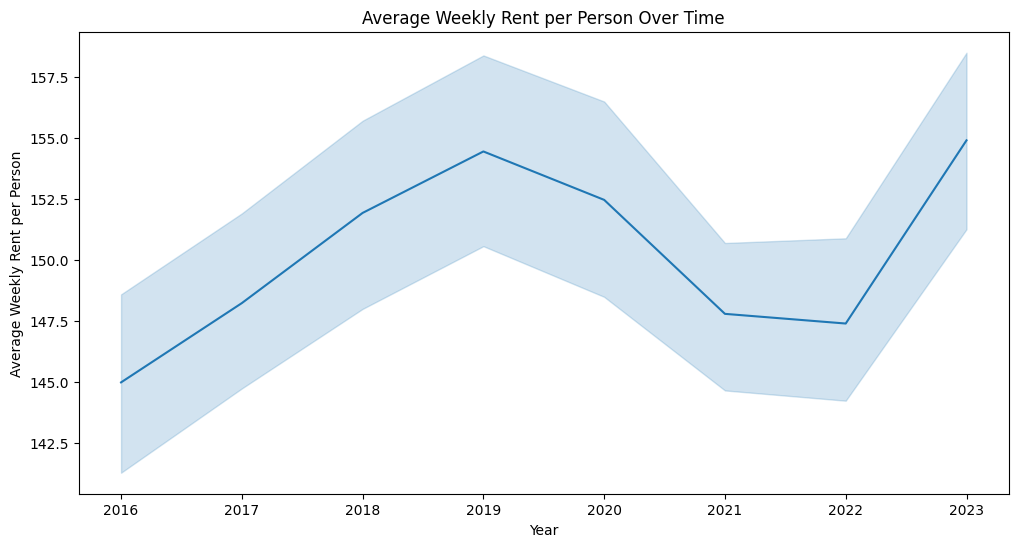

In [31]:
# plot target for each year to see if there are any trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y=target, data=df)
plt.title('Average Weekly Rent per Person Over Time')
plt.xlabel('Year')
plt.ylabel('Average Weekly Rent per Person')
plt.show()

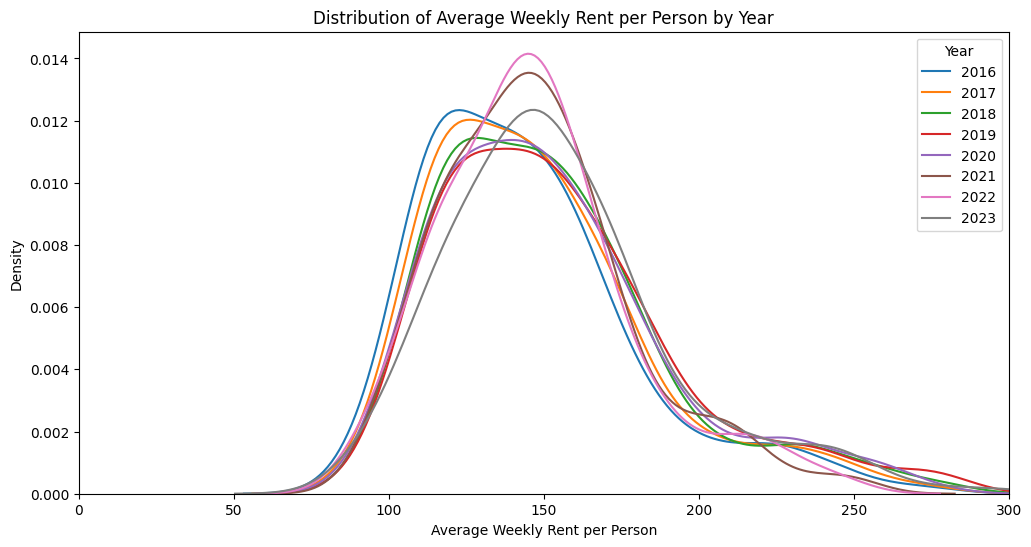

In [32]:
plt.figure(figsize=(12, 6))
for year in df['year'].unique():
    sns.kdeplot(df[df['year'] == year][target], label=year)

plt.title('Distribution of Average Weekly Rent per Person by Year')
plt.xlabel('Average Weekly Rent per Person')
plt.ylabel('Density')
plt.xlim(0, 300)
plt.legend(title='Year')
plt.show()


<Axes: xlabel='average_weekly_rent/inflation/household_size', ylabel='Count'>

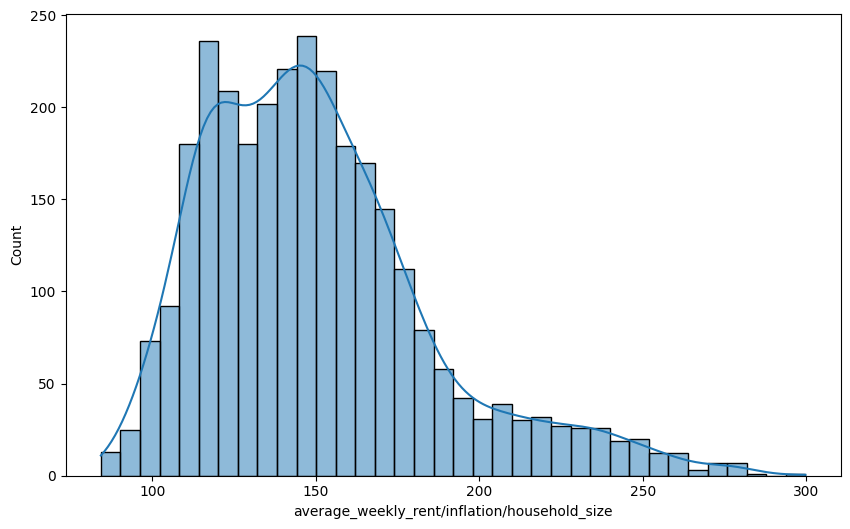

In [33]:
# Plot the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df[target], kde=True)

In [34]:
# drop speedtest
df.drop(columns=['avg_d_mbps_wt','internet_speed_test_count'], inplace=True)

In [35]:
df.dropna(inplace=True)

In [36]:
df.columns

Index(['distance_to_CBD', 'time_to_CBD', 'distance_to_station',
       'time_to_station', 'Cemeteries', 'Civic squares and promenades',
       'Conservation reserves', 'Government schools',
       'Natural and semi-natural open space', 'Non-government schools',
       'Parks and gardens', 'Public housing reserves', 'Recreation corridor',
       'Services and utilities reserves',
       'Sportsfields and organised recreation', 'Tertiary institutions',
       'Transport reservations', 'year', 'Average_household_size',
       'Average_num_psns_per_bedroom', 'Median_age_persons', 'Tot_P_P',
       'Total_dwelings', 'average_quarterly_count', 'commercial', 'education',
       'food_establishments', 'healthcare', 'industrial', 'public_transport',
       'recreation', 'residential', 'shopping', 'SAL_CODE', 'median_score',
       'average_price', 'proximity_to_beach', 'interest_rate',
       'Median_tot_fam_inc_weekly/inflation',
       'Median_tot_hhd_inc_weekly/inflation',
       'Median_tot

In [37]:
# remove Nan for target variable
df = df[~df[target].isna()]

In [38]:
max_value = df[target].max()
min_value = df[target].min()

print(f"Maximum value: {max_value}")
print(f"Minimum value: {min_value}")

# remove non numbers (infinity)
df = df[np.isfinite(df[target])]
df = df[~df[target].isna()]

Maximum value: 299.73911595351433
Minimum value: 84.24033790736551


In [39]:
df.to_csv("../data/curated/procesed_data.csv", index=False)

In [40]:
df_dropped = df.drop(columns=['SAL_CODE', 'year', 'average_quarterly_count'])

In [41]:
from sklearn.model_selection import train_test_split

X = df_dropped.drop(columns=[target])
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(df_dropped.drop(columns=[target]), df[target], test_size=0.2, random_state=42)

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model on the scaled training data
lr_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression Mean Squared Error: {mse_lr}")
print(f"Linear Regression R^2 Score: {r2_lr}")

Linear Regression Mean Squared Error: 172.59832739009397
Linear Regression R^2 Score: 0.8553530946559482


In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the StandardScaler
scaler = StandardScaler()



# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Train the model on the scaled training data
rf_model.fit(X_train, y_train)

# Make predictions on the scaled test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R^2 Score: {r2_rf}")

Random Forest Mean Squared Error: 50.15282855331339
Random Forest R^2 Score: 0.957969167174537


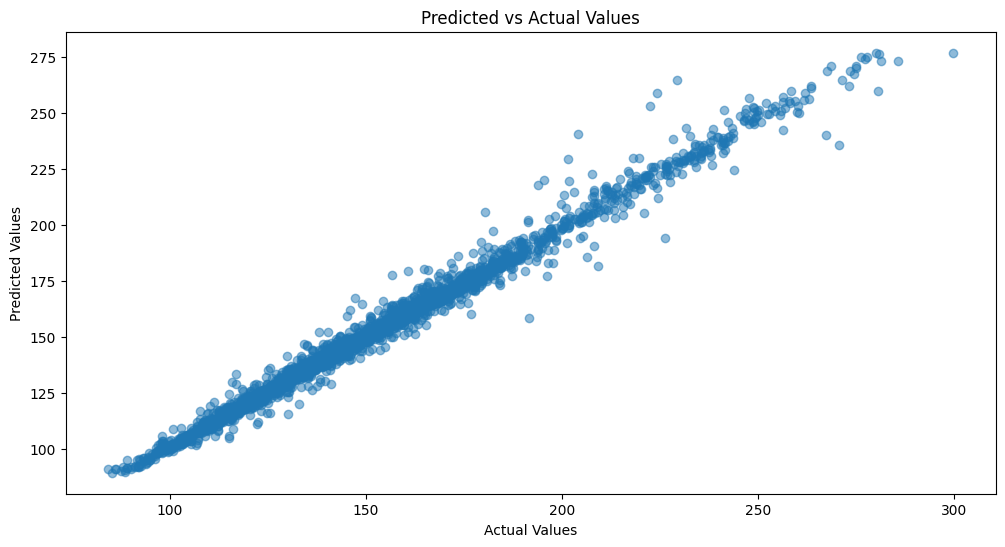

In [44]:
# Plot predicted vs actual values
plt.figure(figsize=(12, 6))
plt.scatter(y, rf_model.predict(X), alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()

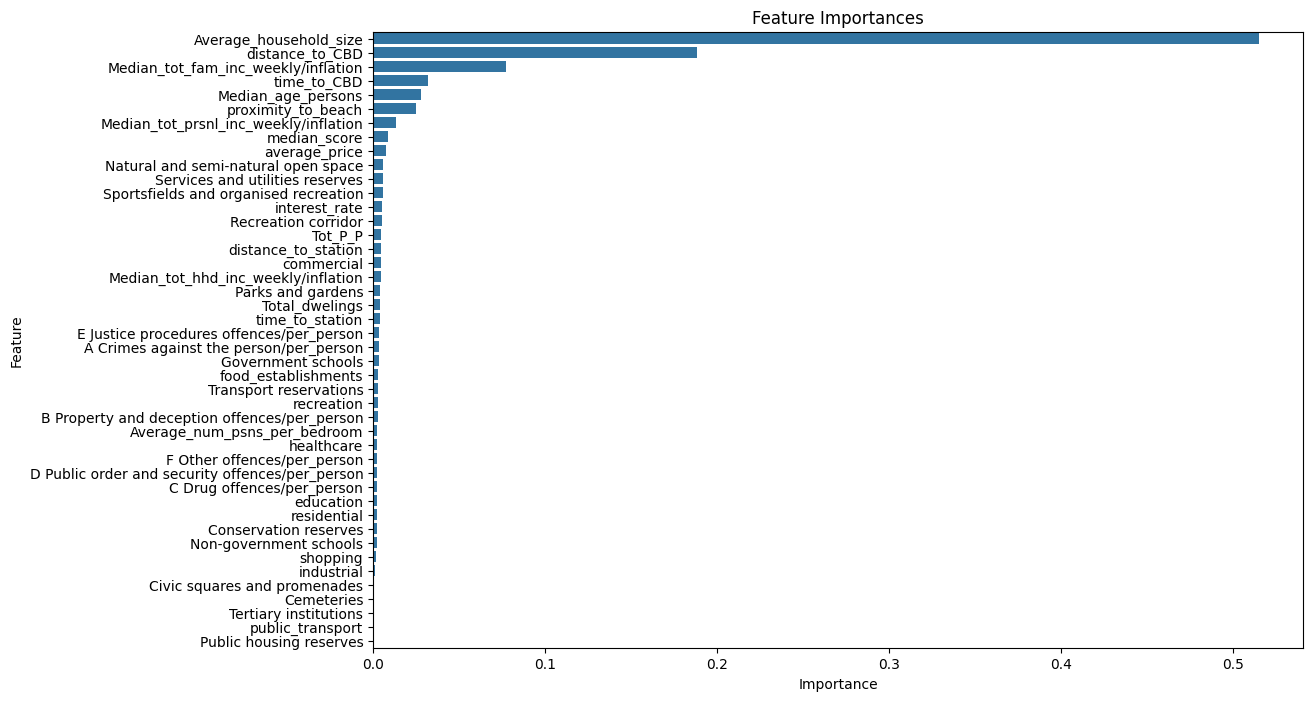

In [45]:
import seaborn as sns

import matplotlib.pyplot as plt

# Get feature importances from the RandomForest model
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=importances[indices], y=X_train.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [46]:
from sklearn.model_selection import train_test_split
# Define features (X) and target (y)
X = df.drop(columns=[target, 'SAL_CODE'])
y = df[target]
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Add a constant to the features (X) for the intercept term
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4269)



# drop year
X_train.drop(columns=['year'], inplace=True)
X_test.drop(columns=['year'], inplace=True)


# Initialize and train the OLS model
model = sm.OLS(y_train, X_train).fit()

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(model.summary())


Mean Squared Error: 196.1967630696774
R^2 Score: 0.8576090483509868
                                         OLS Regression Results                                         
Dep. Variable:     average_weekly_rent/inflation/household_size   R-squared:                       0.860
Model:                                                      OLS   Adj. R-squared:                  0.857
Method:                                           Least Squares   F-statistic:                     317.9
Date:                                          Tue, 01 Oct 2024   Prob (F-statistic):               0.00
Time:                                                  18:45:15   Log-Likelihood:                -9469.6
No. Observations:                                          2374   AIC:                         1.903e+04
Df Residuals:                                              2328   BIC:                         1.930e+04
Df Model:                                                    45                             

In [47]:
import pandas as pd

import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out=0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() 
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

# Perform stepwise selection
result = stepwise_selection(X_train, y_train)

print('Selected features:')
print(result)

Add  time_to_CBD                    with p-value 0.0
Add  const                          with p-value 0.0


/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_4699/2718055390.py:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_4699/2718055390.py:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_4699/2718055390.py:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_4699/2718055390.py:26: FutureWarning: The default dtype for empty Series will be 'object' inste

Add  Average_household_size         with p-value 0.0
Add  Median_tot_fam_inc_weekly/inflation with p-value 6.89205e-163
Add  average_quarterly_count        with p-value 3.61759e-22

/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_4699/2718055390.py:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_4699/2718055390.py:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  Civic squares and promenades   with p-value 2.09222e-21
Add  proximity_to_beach             with p-value 1.18621e-22


/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_4699/2718055390.py:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_4699/2718055390.py:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  interest_rate                  with p-value 4.11871e-15


/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_4699/2718055390.py:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  food_establishments            with p-value 9.51681e-12


/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_4699/2718055390.py:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  Natural and semi-natural open space with p-value 1.54445e-17


/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_4699/2718055390.py:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  Transport reservations         with p-value 5.00758e-12


/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_4699/2718055390.py:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  Median_age_persons             with p-value 7.60578e-12


/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_4699/2718055390.py:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  D Public order and security offences/per_person with p-value 1.36514e-12
Add  time_to_station                with p-value 2.09459e-08


/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_4699/2718055390.py:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_4699/2718055390.py:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  median_score                   with p-value 1.87246e-07


/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_4699/2718055390.py:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  Public housing reserves        with p-value 1.68768e-07


/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_4699/2718055390.py:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  Recreation corridor            with p-value 8.06758e-06


/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_4699/2718055390.py:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  residential                    with p-value 0.000106352


/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_4699/2718055390.py:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  Median_tot_prsnl_inc_weekly/inflation with p-value 0.000186895


/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_4699/2718055390.py:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  industrial                     with p-value 0.0087035


/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_4699/2718055390.py:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Selected features:
['time_to_CBD', 'const', 'Average_household_size', 'Median_tot_fam_inc_weekly/inflation', 'average_quarterly_count', 'Civic squares and promenades', 'proximity_to_beach', 'interest_rate', 'food_establishments', 'Natural and semi-natural open space', 'Transport reservations', 'Median_age_persons', 'D Public order and security offences/per_person', 'time_to_station', 'median_score', 'Public housing reserves', 'Recreation corridor', 'residential', 'Median_tot_prsnl_inc_weekly/inflation', 'industrial']


In [48]:
# Use the selected features from stepwise selection
selected_features = result

# Define the new training and testing sets based on the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Initialize and train the Linear Regression model
lr_model_selected = LinearRegression()
lr_model_selected.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_selected = lr_model_selected.predict(X_test_selected)

# Evaluate the model
mse_selected = mean_squared_error(y_test, y_pred_selected)
r2_selected = r2_score(y_test, y_pred_selected)

print(f"Linear Regression with Selected Features Mean Squared Error: {mse_selected}")
print(f"Linear Regression with Selected Features R^2 Score: {r2_selected}")

Linear Regression with Selected Features Mean Squared Error: 200.7039768423076
Linear Regression with Selected Features R^2 Score: 0.8543379115170808


In [49]:
selected_features

['time_to_CBD',
 'const',
 'Average_household_size',
 'Median_tot_fam_inc_weekly/inflation',
 'average_quarterly_count',
 'Civic squares and promenades',
 'proximity_to_beach',
 'interest_rate',
 'food_establishments',
 'Natural and semi-natural open space',
 'Transport reservations',
 'Median_age_persons',
 'D Public order and security offences/per_person',
 'time_to_station',
 'median_score',
 'Public housing reserves',
 'Recreation corridor',
 'residential',
 'Median_tot_prsnl_inc_weekly/inflation',
 'industrial']

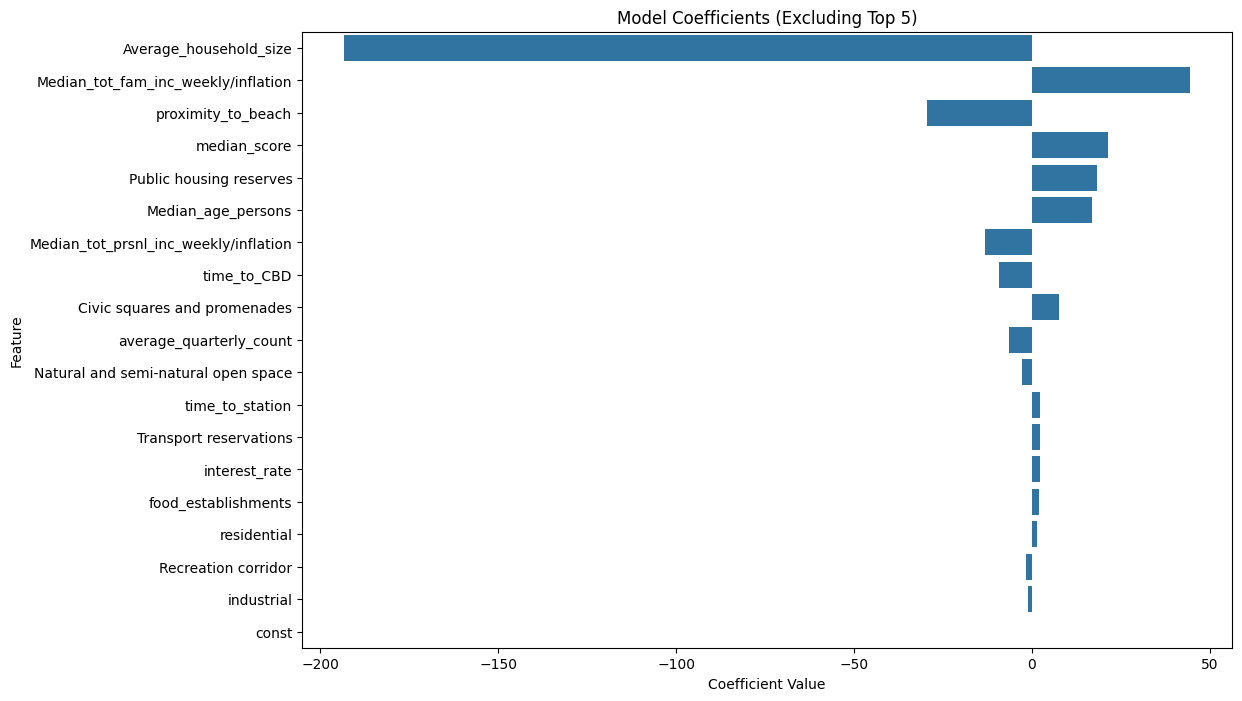

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the coefficients from the model
coefficients = lr_model_selected.coef_
coefficients = pd.Series(coefficients, index=X_train_selected.columns)

# Sort the coefficients by their absolute values
coefficients = coefficients.sort_values(key=abs, ascending=False)

# Remove the top 5 coefficients
coefficients = coefficients[1:]

# Plot the remaining coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x=coefficients.values, y=coefficients.index)
plt.title('Model Coefficients (Excluding Top 5)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [51]:
# top ten coeffs and name
# Get the coefficients from the model
coefficients = model.params

# Get the top 10 coefficient
top_10_coeffs = coefficients.nlargest(20)



# Print the top 10 coefficients and their names
print(top_10_coeffs)

D Public order and security offences/per_person    33908.312910
F Other offences/per_person                        16618.322669
B Property and deception offences/per_person        9174.794603
A Crimes against the person/per_person              2390.180911
Median_tot_fam_inc_weekly/inflation                   45.924449
Average_num_psns_per_bedroom                          28.349396
const                                                 24.289492
median_score                                          21.594557
Median_age_persons                                    19.457837
Public housing reserves                               17.758957
Tot_P_P                                                7.818550
Civic squares and promenades                           7.479788
public_transport                                       2.919828
time_to_station                                        2.758308
Median_tot_hhd_inc_weekly/inflation                    2.645060
interest_rate                           

In [52]:
# Initialize and train the Random Forest model
from sklearn.ensemble import RandomForestRegressor


rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R^2 Score: {r2_rf}")

Random Forest Mean Squared Error: 39.528078955465126
Random Forest R^2 Score: 0.971312264834221


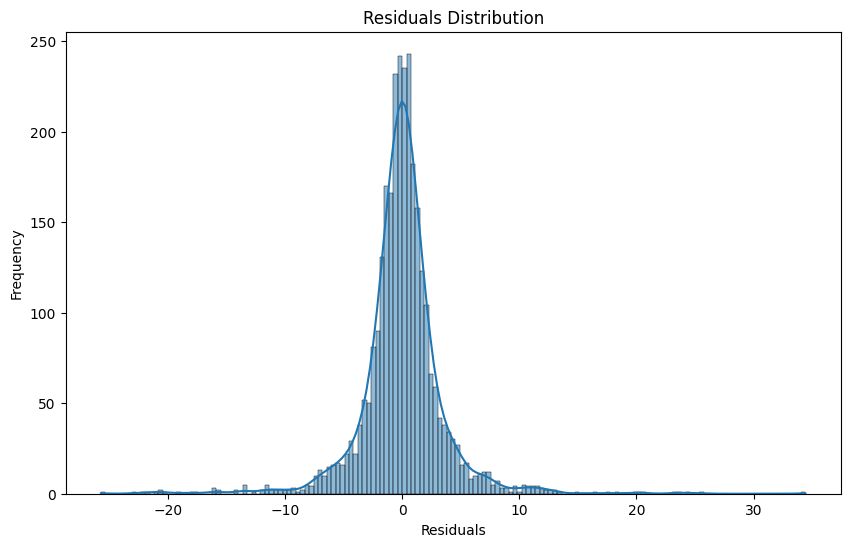

In [53]:
# plot residuals
# Calculate residuals
# Calculate residuals for the whole DataFrame
y_pred = rf_model.predict(X.drop(columns=['year']))
residuals = y - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [54]:
X_train.columns


X_train.drop(columns=['average_quarterly_count'], inplace=True)
X_test.drop(columns=['average_quarterly_count'], inplace=True)

In [55]:
import geopandas as gpd
import pandas as pd

In [56]:
def generate_plot(ax, df, col, sal_code = "SAL_CODE", name=""):
    sal_code = gpd.read_file("../data/landing/SAL_data/SAL_2021_AUST_GDA2020.shp")

    # Drop non-integer SAL_CODE21 values
    sal_code = sal_code[sal_code['SAL_CODE21'].apply(lambda x: str(x).isdigit())]
    sal_code["SAL_CODE21"] = sal_code["SAL_CODE21"].astype(int)
    
    merged_df = sal_code.merge(df, left_on='SAL_CODE21', right_on='SAL_CODE', how='inner')
    merged_df.plot(column=col, ax=ax, legend=True, cmap='coolwarm')

    

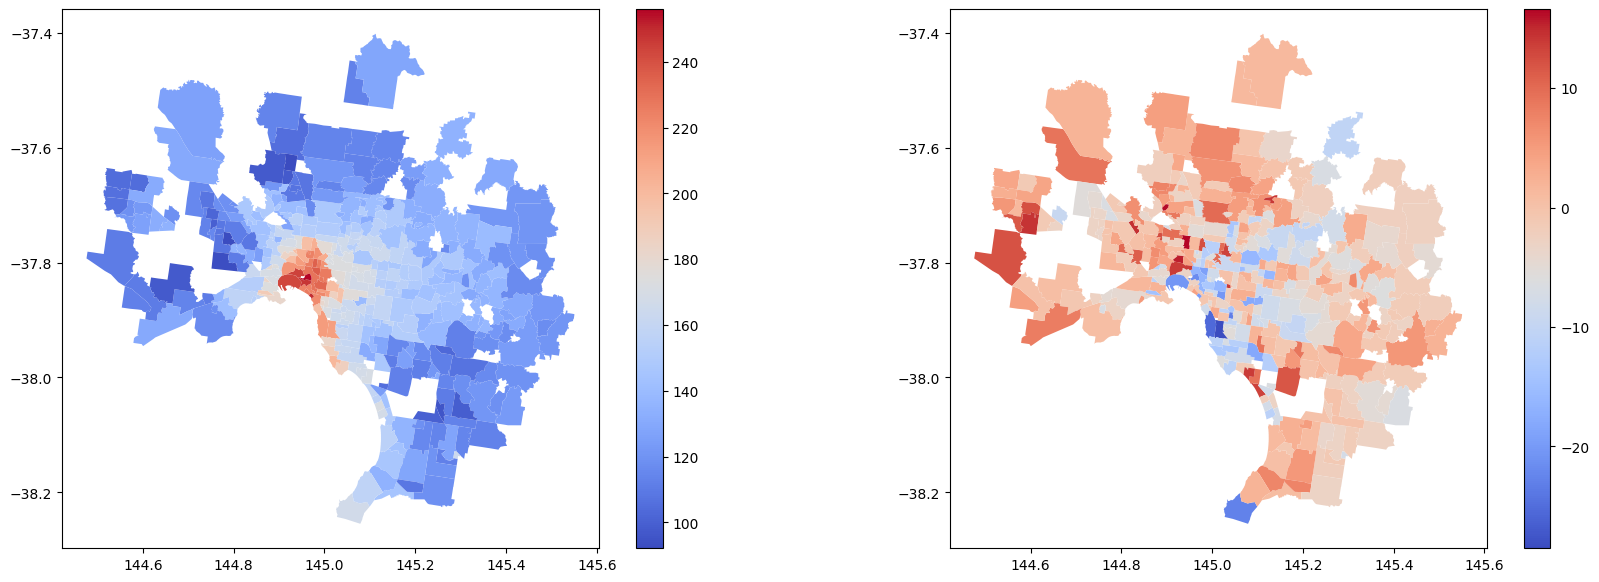

/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_4699/578931199.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'train_years': train_years, 'test_year': test_year, 'mse': mse, 'r2': r2}, ignore_index=True)


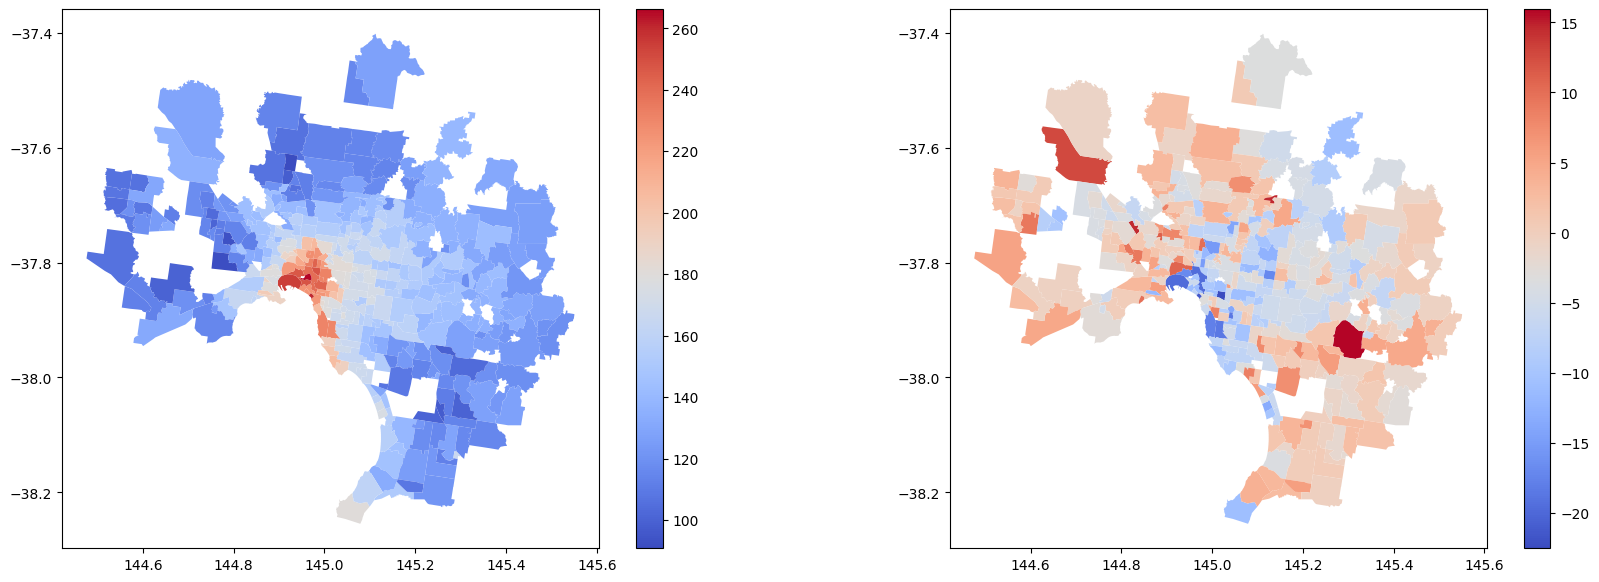

/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_4699/578931199.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'train_years': train_years, 'test_year': test_year, 'mse': mse, 'r2': r2}, ignore_index=True)


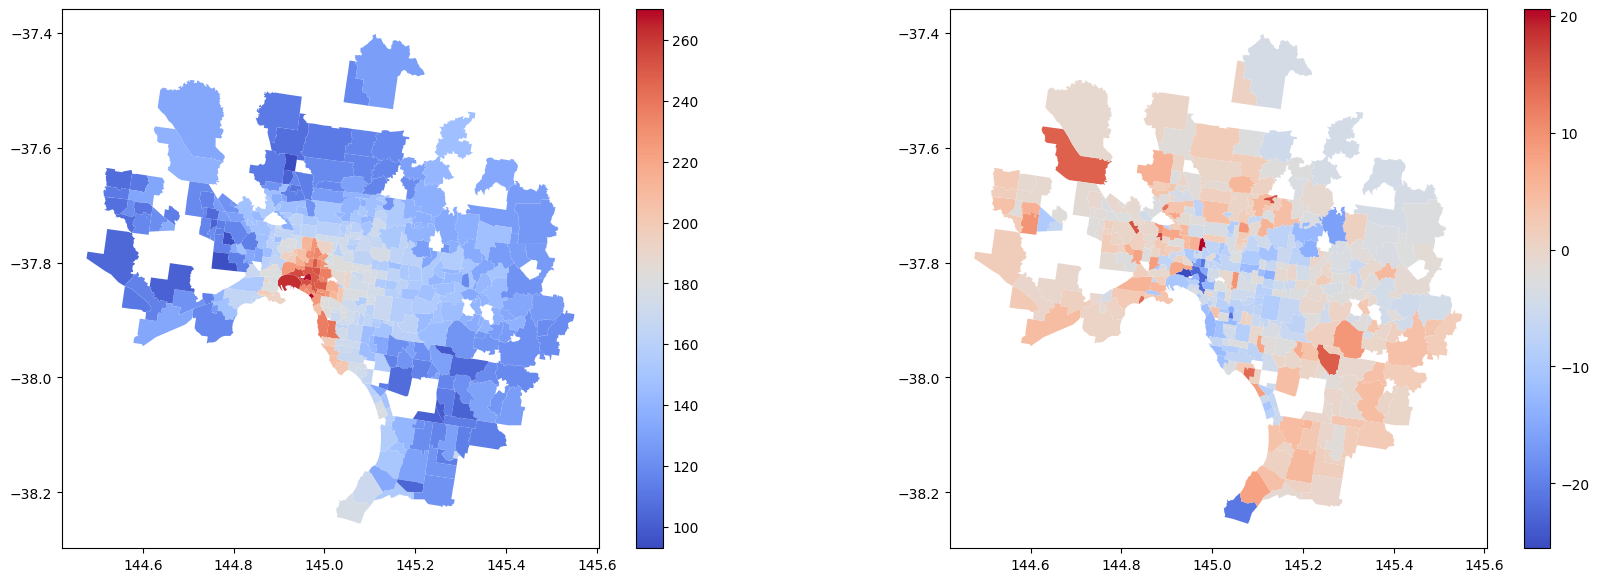

/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_4699/578931199.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'train_years': train_years, 'test_year': test_year, 'mse': mse, 'r2': r2}, ignore_index=True)


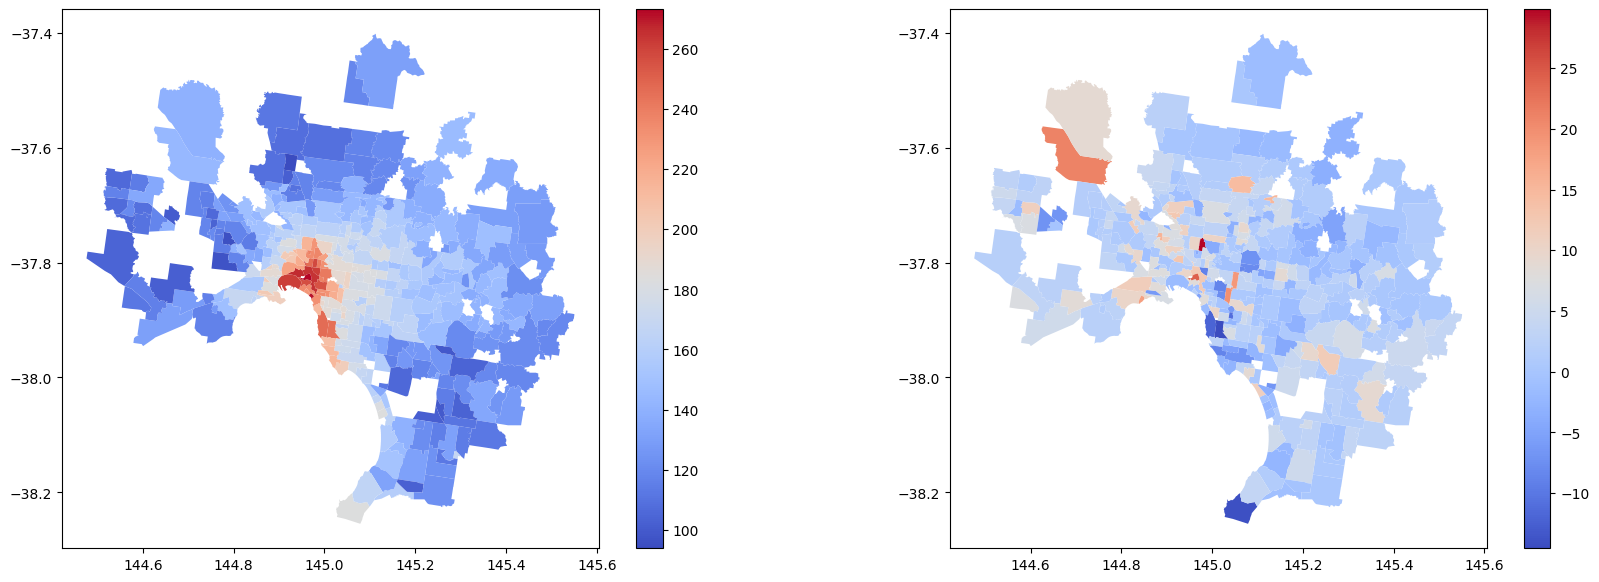

/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_4699/578931199.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'train_years': train_years, 'test_year': test_year, 'mse': mse, 'r2': r2}, ignore_index=True)


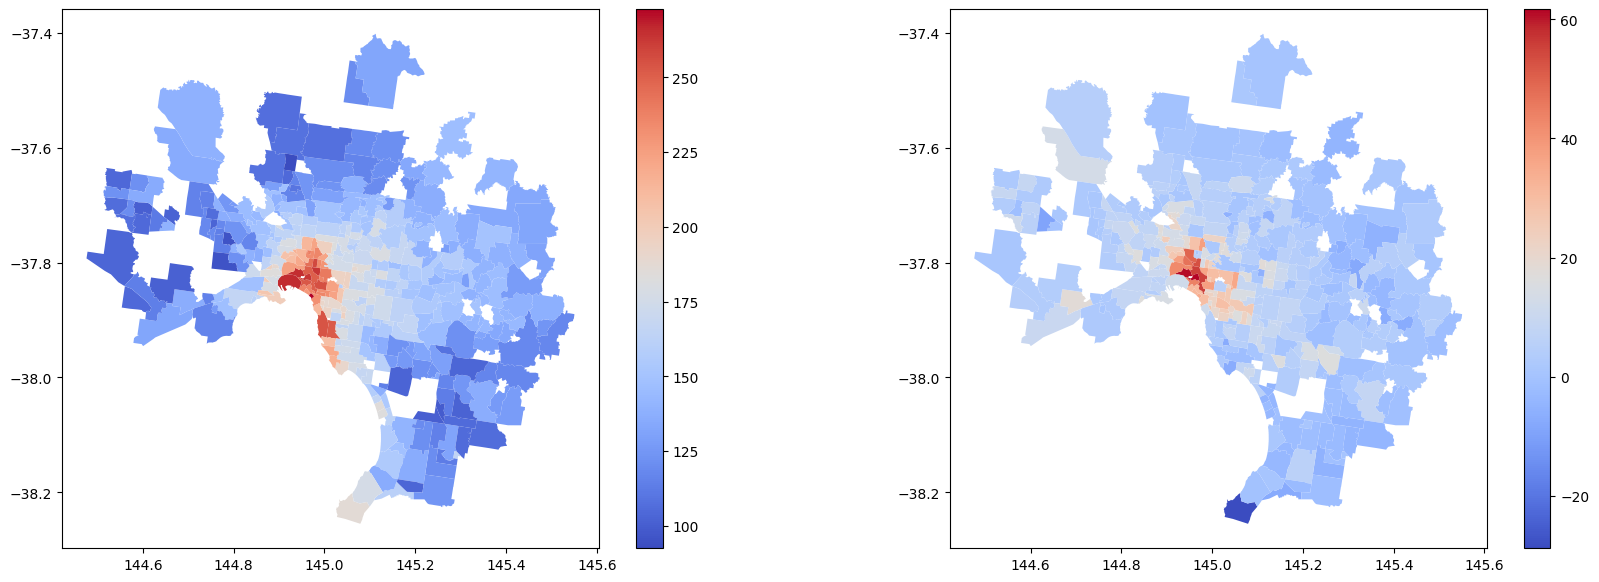

/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_4699/578931199.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'train_years': train_years, 'test_year': test_year, 'mse': mse, 'r2': r2}, ignore_index=True)


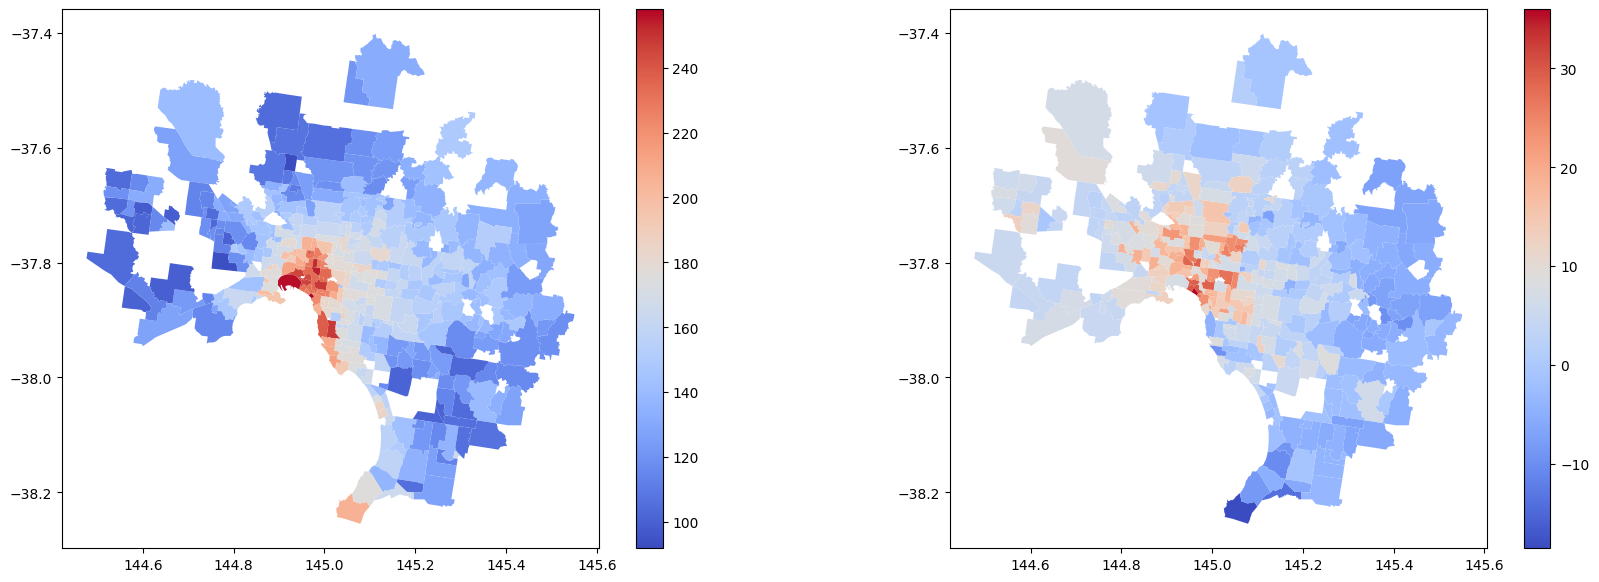

/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_4699/578931199.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'train_years': train_years, 'test_year': test_year, 'mse': mse, 'r2': r2}, ignore_index=True)


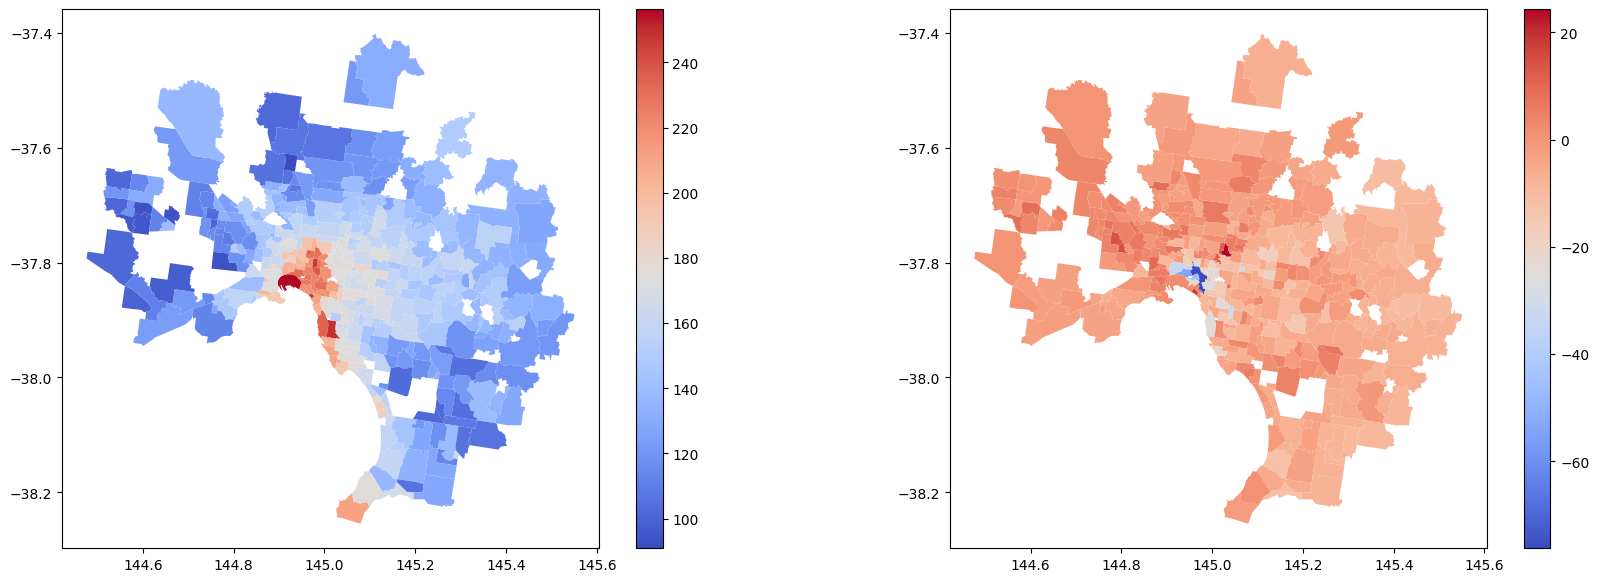

                                  train_years test_year         mse        r2
0                                      [2016]    [2017]   54.398792  0.956559
1                                [2016, 2017]    [2018]   39.555079  0.970544
2                          [2016, 2017, 2018]    [2019]   40.030061  0.972574
3                    [2016, 2017, 2018, 2019]    [2020]   32.125767  0.976566
4              [2016, 2017, 2018, 2019, 2020]    [2021]  180.525816  0.810519
5        [2016, 2017, 2018, 2019, 2020, 2021]    [2022]  103.555746  0.893851
6  [2016, 2017, 2018, 2019, 2020, 2021, 2022]    [2023]   92.803650  0.931358


/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_4699/578931199.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'train_years': train_years, 'test_year': test_year, 'mse': mse, 'r2': r2}, ignore_index=True)


In [57]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize the TimeSeriesSplit with the number of splits equal to the number of years minus one
years = sorted(df['year'].unique())
n_splits = len(years) - 1
tscv = TimeSeriesSplit(n_splits=n_splits)

# Prepare a DataFrame to store the results
results = pd.DataFrame(columns=['train_years', 'test_year', 'mse', 'r2'])

# Iterate through the splits
for train_index, test_index in tscv.split(df):
    train_years = df.iloc[train_index]['year'].unique()
    test_year = df.iloc[test_index]['year'].unique()
    
    # Split the data into training and testing sets
    X_train, X_test = df.iloc[train_index].drop(columns=[target, 'year']), df.iloc[test_index].drop(columns=[target, 'year'])
    y_train, y_test = df.iloc[train_index][target], df.iloc[test_index][target]

    
    # Initialize and train the model
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    SAL_test = df.iloc[test_index]['SAL_CODE']
    
    df_graphing = pd.DataFrame({
        'SAL_CODE': SAL_test,
        'pred': y_pred,
        'actual' : y_test,
        'residuals': y_pred - y_test
    })
    

    fig, axes = plt.subplots(1, 2, figsize=(21, 7))

    generate_plot(axes[0], df_graphing, "pred", )
    generate_plot(axes[1], df_graphing, 'residuals')


    plt.show()
    
    # Store the results
    results = results.append({'train_years': train_years, 'test_year': test_year, 'mse': mse, 'r2': r2}, ignore_index=True)

# Display the results
print(results)

In [58]:
df.columns

Index(['distance_to_CBD', 'time_to_CBD', 'distance_to_station',
       'time_to_station', 'Cemeteries', 'Civic squares and promenades',
       'Conservation reserves', 'Government schools',
       'Natural and semi-natural open space', 'Non-government schools',
       'Parks and gardens', 'Public housing reserves', 'Recreation corridor',
       'Services and utilities reserves',
       'Sportsfields and organised recreation', 'Tertiary institutions',
       'Transport reservations', 'year', 'Average_household_size',
       'Average_num_psns_per_bedroom', 'Median_age_persons', 'Tot_P_P',
       'Total_dwelings', 'average_quarterly_count', 'commercial', 'education',
       'food_establishments', 'healthcare', 'industrial', 'public_transport',
       'recreation', 'residential', 'shopping', 'SAL_CODE', 'median_score',
       'average_price', 'proximity_to_beach', 'interest_rate',
       'Median_tot_fam_inc_weekly/inflation',
       'Median_tot_hhd_inc_weekly/inflation',
       'Median_tot

In [59]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold


# Initialize the TimeSeriesSplit with the number of splits equal to the number of years minus one
years = sorted(df['year'].unique())
n_splits = len(years) - 1
tscv = TimeSeriesSplit(n_splits=n_splits)

# Prepare a DataFrame to store the results
results = pd.DataFrame(columns=['train_years', 'test_year', 'mse', 'r2'])

# Iterate through the splits
for train_index, test_index in tscv.split(df):
    
    train_years = df.iloc[train_index]['year'].unique()
    test_year = df.iloc[test_index]['year'].unique()[0]
    
    # Split the data into training and testing sets
    X_train, X_test = df.iloc[train_index].drop(columns=[target, 'year','SAL_CODE']), df.iloc[test_index].drop(columns=[target, 'year','SAL_CODE'])
    y_train, y_test = df.iloc[train_index][target], df.iloc[test_index][target]
    
    # Initialize and train the model
    model = xgb.XGBRegressor(objective='reg:squarederror')
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    results = results.append({'train_years': train_years, 'test_year': test_year, 'mse': mse, 'r2': r2}, ignore_index=True)

# Display the results
print(results)

/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_4699/2937005536.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'train_years': train_years, 'test_year': test_year, 'mse': mse, 'r2': r2}, ignore_index=True)
/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_4699/2937005536.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'train_years': train_years, 'test_year': test_year, 'mse': mse, 'r2': r2}, ignore_index=True)
/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_4699/2937005536.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'train_years': train_years, 'test_year': test_year, 'mse': mse, 'r2': r2}, ignore_i

                                  train_years test_year         mse        r2
0                                      [2016]      2017   43.706176  0.965098
1                                [2016, 2017]      2018   30.471768  0.977308
2                          [2016, 2017, 2018]      2019   32.496155  0.977736
3                    [2016, 2017, 2018, 2019]      2020   36.558443  0.973333
4              [2016, 2017, 2018, 2019, 2020]      2021  167.723163  0.823957
5        [2016, 2017, 2018, 2019, 2020, 2021]      2022  114.859293  0.882265
6  [2016, 2017, 2018, 2019, 2020, 2021, 2022]      2023   91.948351  0.931991


/var/folders/vs/mmhmvz2124bdlbwz4b6zdqqh0000gn/T/ipykernel_4699/2937005536.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'train_years': train_years, 'test_year': test_year, 'mse': mse, 'r2': r2}, ignore_index=True)


In [60]:
# Filter the data for the years 2016 to 2019
train_years = [2016, 2017, 2018]
test_year = 2019

# Split the data into training and testing sets
X_train = df[df['year'].isin(train_years)].drop(columns=[target, 'year', 'SAL_CODE'])
y_train = df[df['year'].isin(train_years)][target]
X_test = df[df['year'] == test_year].drop(columns=[target, 'year', 'SAL_CODE'])
y_test = df[df['year'] == test_year][target]

# Initialize and train the model
model = xgb.XGBRegressor(objective='reg:squarederror')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 32.496154804079076
R^2 Score: 0.9777357289794164


In [61]:
# Drop the 'year' column from the dataset
X_no_year = df.drop(columns=[target, 'year','SAL_CODE'])


# Make predictions on the entire dataset
y_pred_xgb_full = model.predict(X_no_year)

# Calculate residuals for the entire dataset
residuals_xgb = y - y_pred_xgb_full

# Display the residuals
residuals_xgb

0        0.052448
624     -0.186860
2184    -0.065456
632      0.097208
2176    -0.031474
          ...    
2223   -10.212351
591     -8.605086
2231   -19.832172
2239   -18.129582
2967     2.619931
Name: average_weekly_rent/inflation/household_size, Length: 2968, dtype: float64

In [62]:
residuals.shape

(2968,)

In [63]:
# find SAL code of 10 highest residuals
residuals_df = pd.DataFrame({'SAL_CODE': df['SAL_CODE'], 'year': data_train['year'], 'residuals': residuals,'xg_residuals':residuals_xgb, 'average_weekly_rent': df['average_weekly_rent/inflation/household_size']})

residuals_df



,SAL_CODE,year,residuals,xg_residuals,average_weekly_rent
0,20077,2016,-1.481417,0.052448,154.457569
1,20077,2017,-0.167901,0.074730,157.199120
2,20077,2018,0.460453,-0.124200,160.489112
3,20077,2019,1.736532,4.780394,163.255583
4,20077,2020,0.310512,0.373083,160.386694
...,...,...,...,...,...
2963,22720,2019,1.177150,0.760914,117.428684
2964,22720,2020,2.232249,0.799873,119.363921
2965,22720,2021,4.357006,-1.300963,118.466157
2966,22720,2022,1.912712,-2.166838,118.400042


In [64]:
import geopandas as gpd

In [65]:
# import SAL
sal_code = gpd.read_file("../data/landing/SAL_data/SAL_2021_AUST_GDA2020.shp")

# Drop non-integer SAL_CODE21 values
sal_code = sal_code[sal_code['SAL_CODE21'].apply(lambda x: str(x).isdigit())]
sal_code["SAL_CODE21"] = sal_code["SAL_CODE21"].astype(int)

In [66]:
# residuals_df 
residuals_df = residuals_df.merge(sal_code, right_on='SAL_CODE21', left_on='SAL_CODE')

In [67]:
residuals_df.columns

Index(['SAL_CODE', 'year', 'residuals', 'xg_residuals', 'average_weekly_rent',
       'SAL_CODE21', 'SAL_NAME21', 'STE_CODE21', 'STE_NAME21', 'AUS_CODE21',
       'AUS_NAME21', 'AREASQKM21', 'LOCI_URI21', 'SHAPE_Leng', 'SHAPE_Area',
       'geometry'],
      dtype='object')

In [68]:
from math import radians, cos, sin, asin, sqrt

# for better visualisaiton, remove suburbs too far outside melbourne
# Compute distance to Melbourne CBD
melbourne_cbd_coords = (-37.8136, 144.9631)  # Latitude and Longitude of Melbourne CBD

# Function to calculate distance
def haversine(lat1, lon1, lat2, lon2):
    # convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    # haversine formula
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371  # Radius of earth in kilometers
    return c * r

# Apply the function to calculate distance to Melbourne CBD
residuals_df['distance_to_CBD'] = residuals_df.apply(lambda row: haversine(row['geometry'].centroid.y, row['geometry'].centroid.x, melbourne_cbd_coords[0], melbourne_cbd_coords[1]), axis=1)

# Filter out suburbs too far outside Melbourne (e.g., more than 50 km)
residuals_df = residuals_df[residuals_df['distance_to_CBD'] <= 100]

In [69]:
# look at 2023 residuals

year = [2023]

residuals_2023 = residuals_df[residuals_df["year"] == 2019]

# now make gdf

residuals_2023 = gpd.GeoDataFrame(residuals_2023, geometry='geometry')

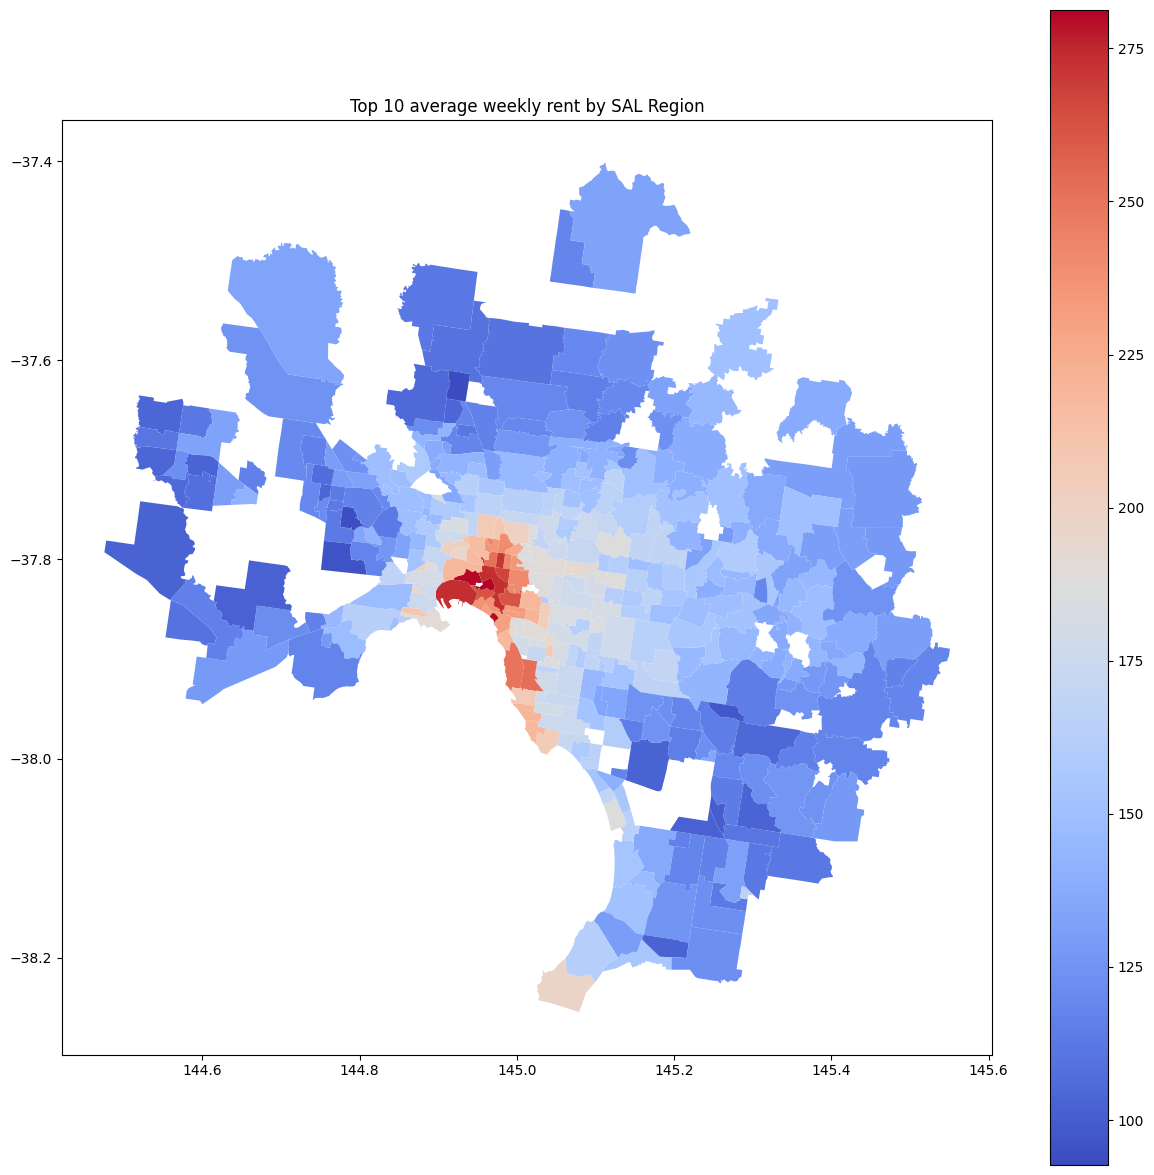

In [70]:
# graph top 10 residuals
fig, ax = plt.subplots(figsize=(15, 15))
residuals_2023.plot(column='average_weekly_rent', ax=ax, legend=True, cmap='coolwarm')
plt.title('Top 10 average weekly rent by SAL Region')
plt.show()

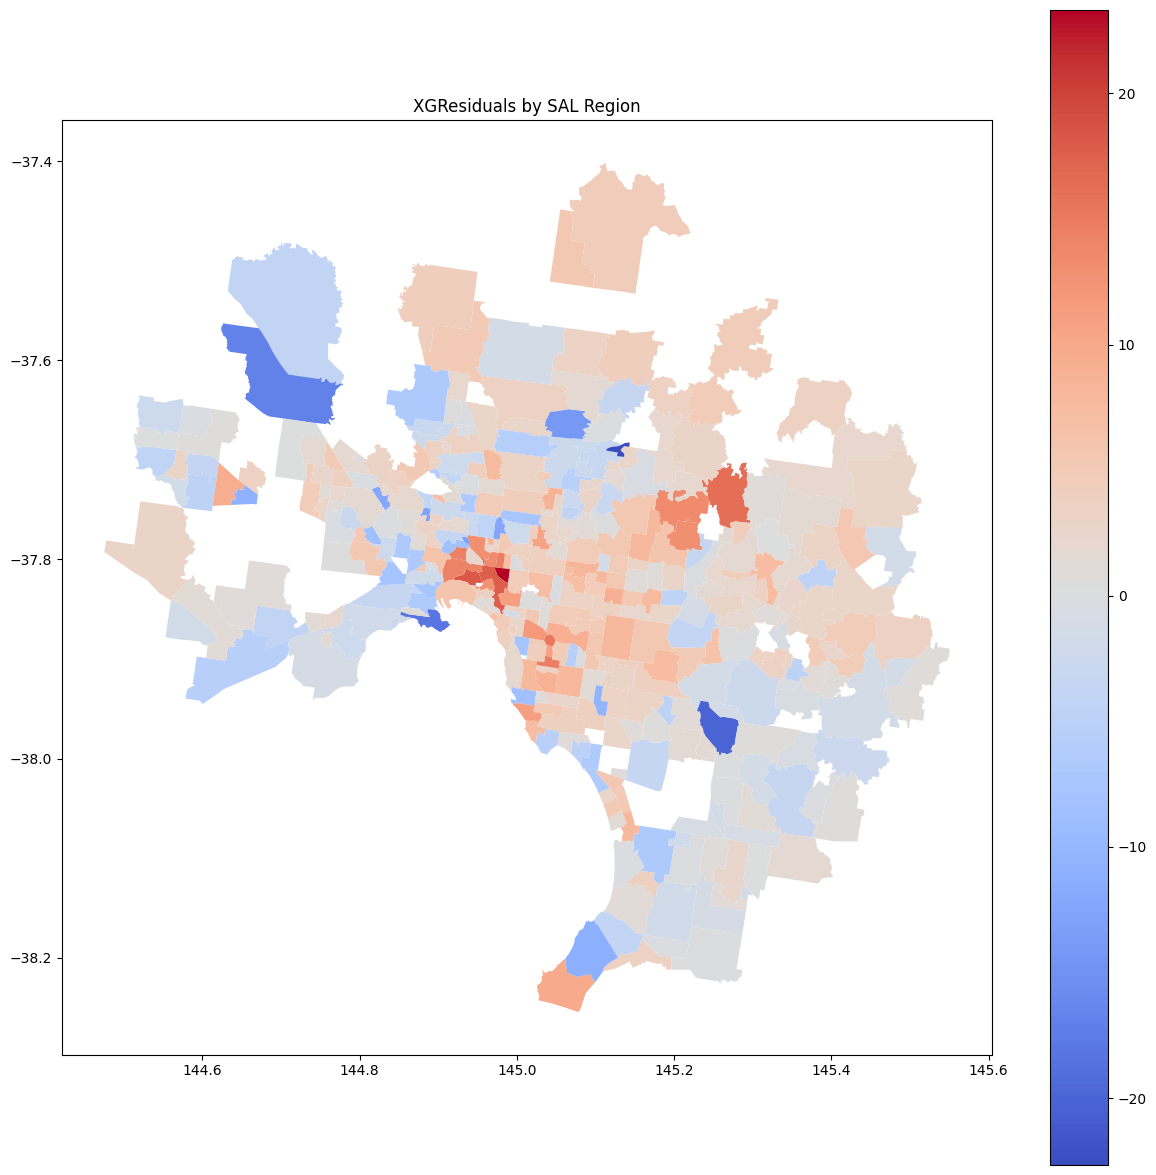

In [71]:
# graph top 10 residuals
fig, ax = plt.subplots(figsize=(15, 15))
residuals_2023.plot(column='xg_residuals', ax=ax, legend=True, cmap='coolwarm')
plt.title('XGResiduals by SAL Region')
plt.show()

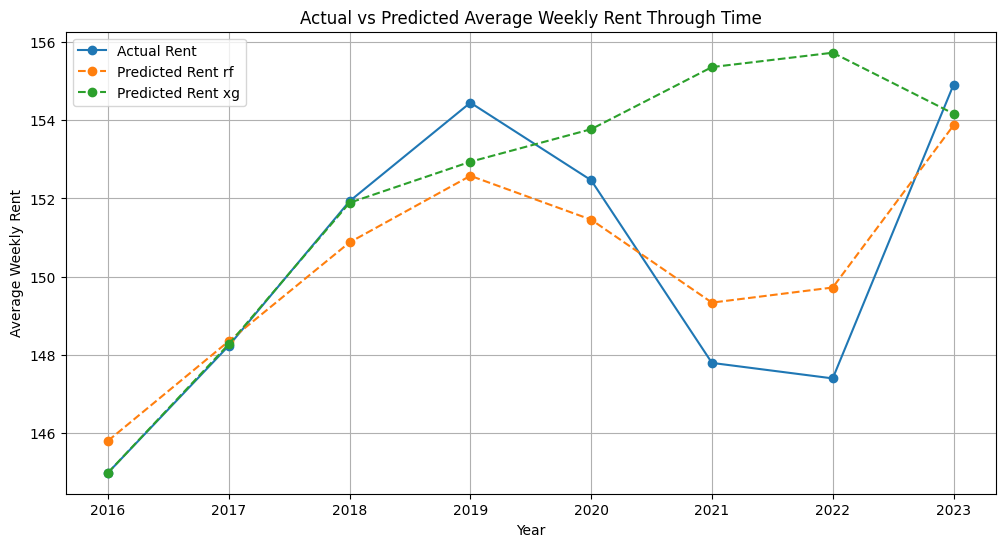

1200

In [72]:
# Calculate the predicted values by subtracting residuals from actual values
residuals_df['predicted_rent'] = residuals_df['average_weekly_rent'] - residuals_df['residuals']
residuals_df['predicted_rent_xg'] = residuals_df['average_weekly_rent'] - residuals_df['xg_residuals']

# Group by year and calculate the mean for actual and predicted rents
mean_rents = residuals_df.groupby('year')[['average_weekly_rent', 'predicted_rent',"predicted_rent_xg"]].mean().reset_index()

# Plot the actual vs predicted rents through time
plt.figure(figsize=(12, 6))
plt.plot(mean_rents['year'], mean_rents['average_weekly_rent'], marker='o', label='Actual Rent')
plt.plot(mean_rents['year'], mean_rents['predicted_rent'], marker='o', label='Predicted Rent rf', linestyle='--')
plt.plot(mean_rents['year'], mean_rents['predicted_rent_xg'], marker='o', label='Predicted Rent xg', linestyle='--')
plt.title('Actual vs Predicted Average Weekly Rent Through Time')
plt.xlabel('Year')
plt.ylabel('Average Weekly Rent')
plt.legend()
plt.grid(True)
plt.show()

150 * 8

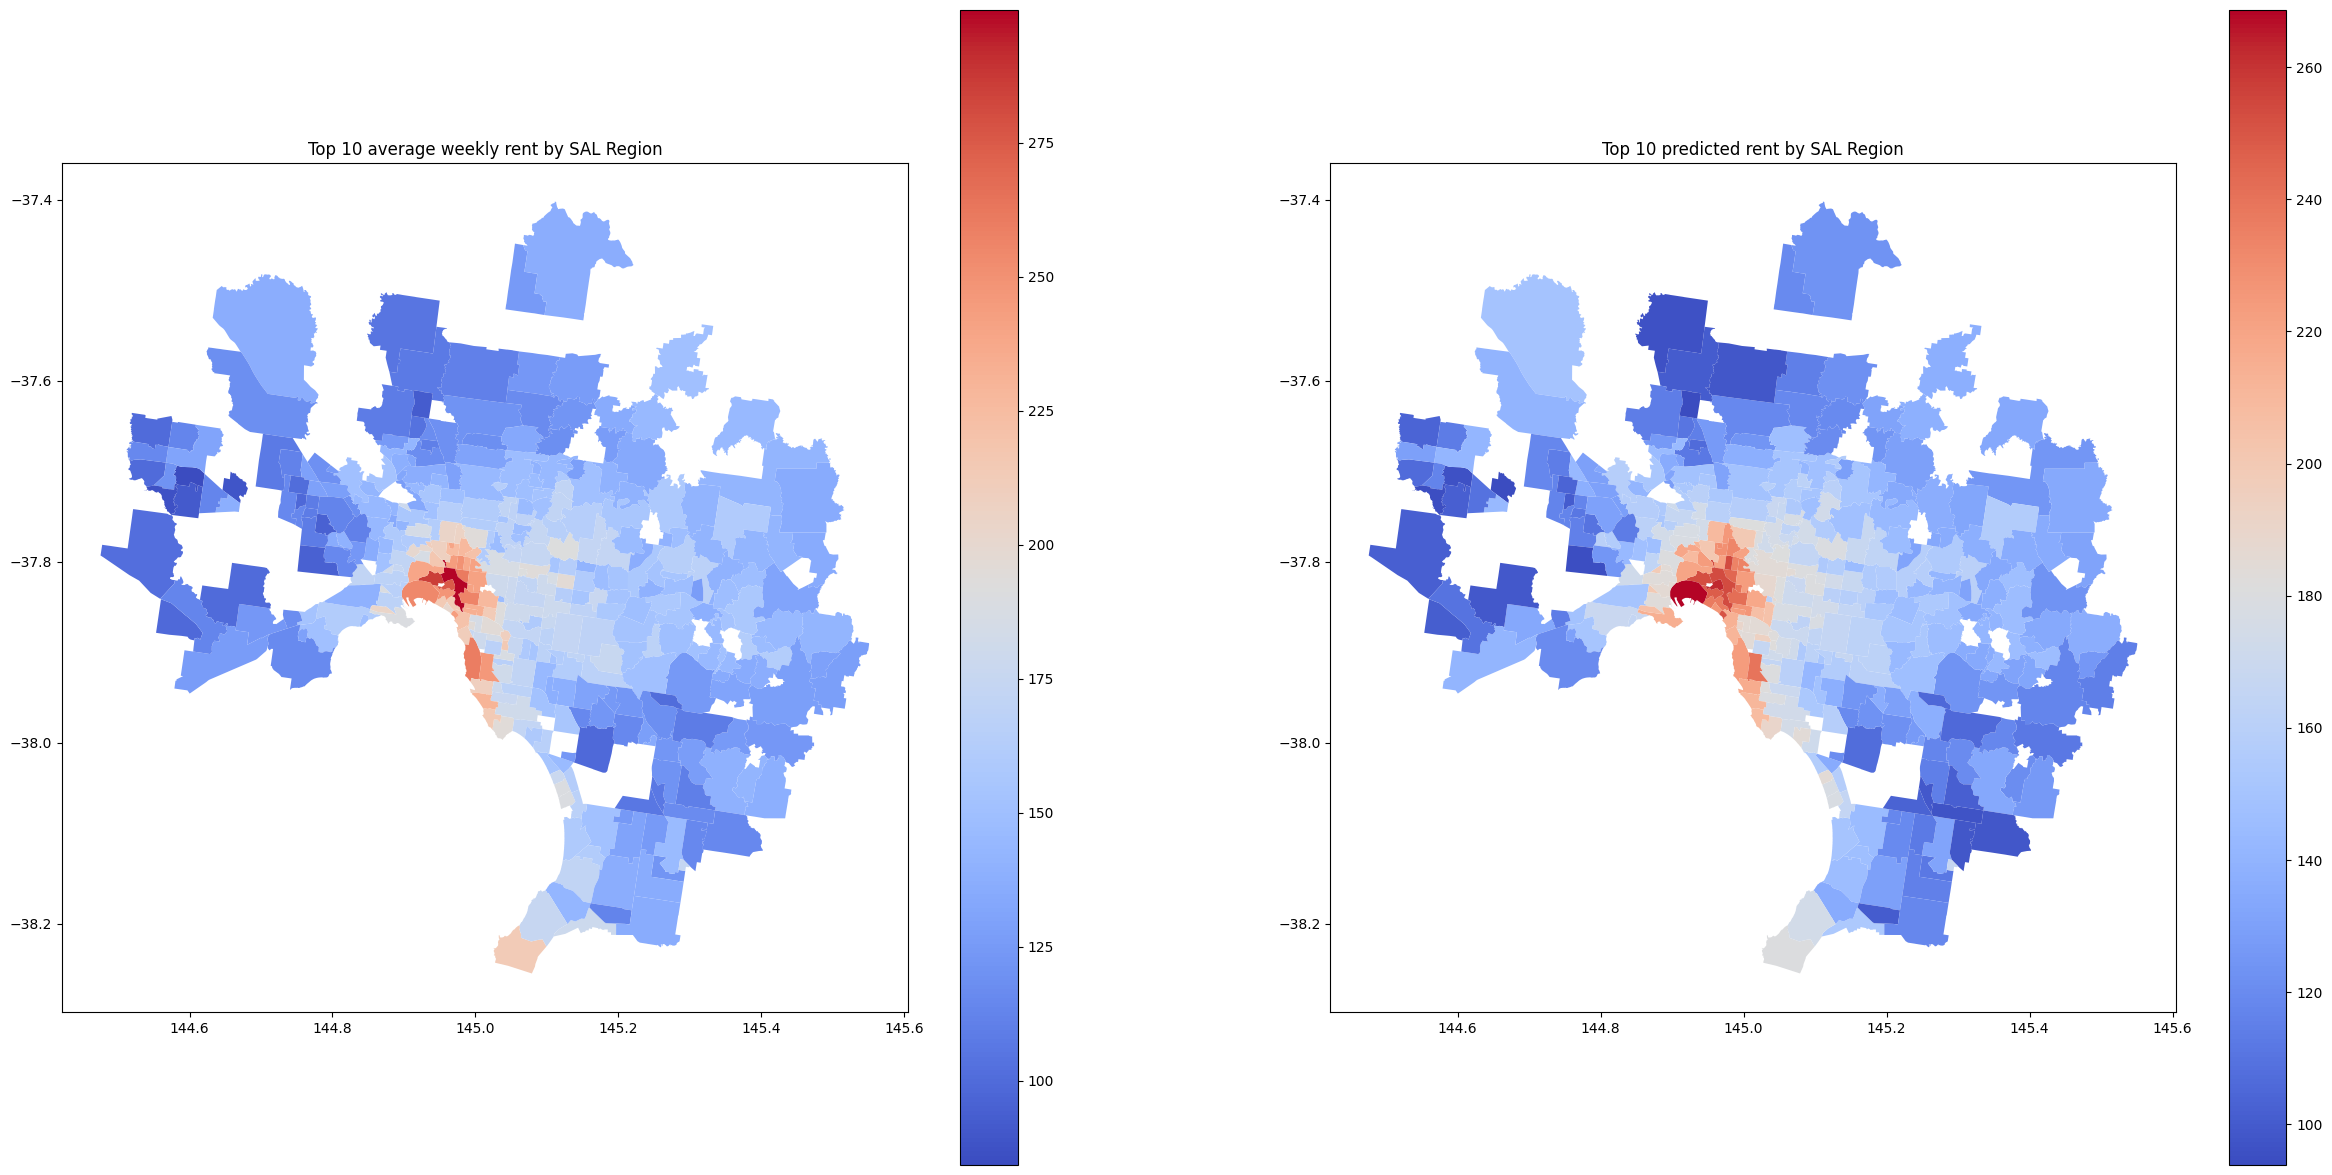

In [73]:

residuals_2023 = residuals_df[residuals_df["year"] == 2023]

# now make gdf

residuals_2023 = gpd.GeoDataFrame(residuals_2023, geometry='geometry')

# graph top 10 residuals
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 15))

residuals_2023.plot(column='average_weekly_rent', ax=ax1, legend=True, cmap='coolwarm')
ax1.set_title('Top 10 average weekly rent by SAL Region')

residuals_2023.plot(column='predicted_rent_xg', ax=ax2, legend=True, cmap='coolwarm')
ax2.set_title('Top 10 predicted rent by SAL Region')

plt.show()


In [74]:
# Filter the data for the years 2018 to 2023 (inclusive)
filtered_df = residuals_df[residuals_df['year'].isin(range(2016,2024))]

# Ensure the data is sorted by year within each group for accurate calculations
filtered_df = filtered_df.sort_values(by=['SAL_CODE', 'year'])

# Calculate the growth in average weekly rent over the last 5 years for each suburb
filtered_df['growth_actual'] = filtered_df.groupby('SAL_CODE')['average_weekly_rent'].transform(
    lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100 if len(x) > 1 else 0
)
filtered_df['growth_predicted'] = filtered_df.groupby('SAL_CODE')['predicted_rent_xg'].transform(
    lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100 if len(x) > 1 else 0
)

# Drop duplicates to get one entry per suburb
suburb_growth_actual = filtered_df.drop_duplicates(subset='SAL_CODE', keep='last')
suburb_growth_predicted = filtered_df.drop_duplicates(subset='SAL_CODE', keep='last')

# Sort the suburbs by the highest growth in actual and predicted rents
highest_growth_actual = suburb_growth_actual.sort_values(by='growth_actual', ascending=False)
highest_growth_predicted = suburb_growth_predicted.sort_values(by='growth_predicted', ascending=False)

# Display the top suburbs with the highest growth
print("Suburbs with the highest growth in actual average weekly rent over the last 5 years:")
print(highest_growth_actual[['SAL_NAME21', 'growth_actual']])

print("\nSuburbs with the highest growth in predicted average weekly rent over the last 5 years:")
print(highest_growth_predicted[['SAL_NAME21', 'growth_predicted']])


Suburbs with the highest growth in actual average weekly rent over the last 5 years:
          SAL_NAME21  growth_actual
527        Melbourne      31.301935
687           Baxter      29.112168
2767  Caulfield East      26.945128
1591        Kallista      26.122846
935        Kingsbury      24.233934
...              ...            ...
2311  Thornhill Park     -15.586545
2247    Strathtulloh     -19.010441
2319      Weir Views     -22.177631
1975      Cobblebank     -25.106430
1855         Aintree     -33.492429

[371 rows x 2 columns]

Suburbs with the highest growth in predicted average weekly rent over the last 5 years:
           SAL_NAME21  growth_predicted
1903           Ardeer         32.920991
2167      Melton West         32.405969
975         Mill Park         29.353162
1959         Cairnlea         28.769934
1071        St Helena         27.997917
...               ...               ...
2439      Clyde North        -15.215260
2463  Cranbourne East        -15.386391
2319      

In [75]:
highest_growth_predicted[highest_growth_predicted["SAL_NAME21"] == 'Melbourne']

,SAL_CODE,year,residuals,xg_residuals,average_weekly_rent,SAL_CODE21,SAL_NAME21,STE_CODE21,STE_NAME21,AUS_CODE21,...,AREASQKM21,LOCI_URI21,SHAPE_Leng,SHAPE_Area,geometry,distance_to_CBD,predicted_rent,predicted_rent_xg,growth_actual,growth_predicted
527,21640,2023,24.339086,46.197932,299.739116,21640,Melbourne,2,Victoria,AUS,...,6.5866,http://linked.data.gov.au/dataset/asgsed3/SAL/...,0.21602,0.000674,"POLYGON ((144.96885 -37.80728, 144.97094 -37.8...",1.458285,275.40003,253.541183,31.301935,11.064704


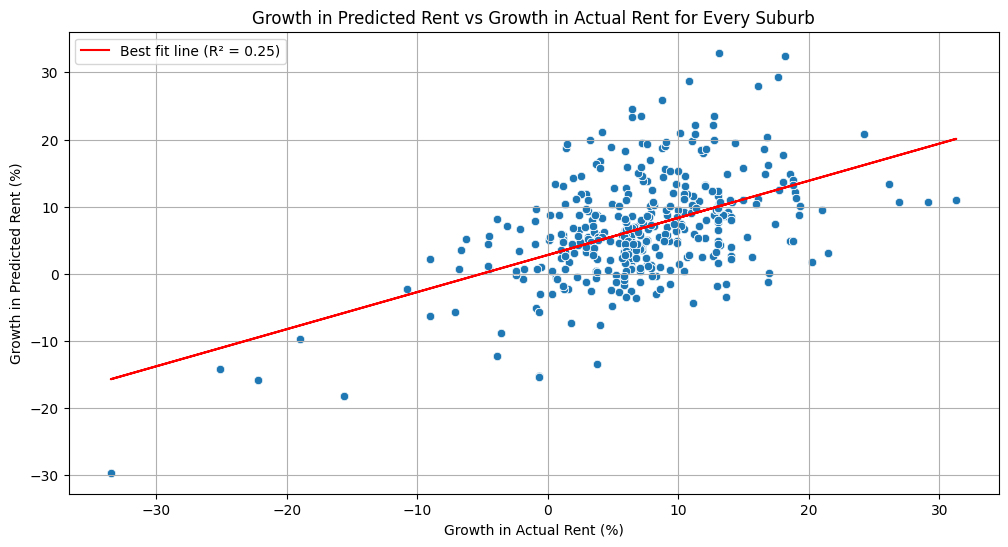

In [76]:
from scipy.stats import linregress

# Scatter plot of growth in predicted rent vs growth in actual rent for every suburb
plt.figure(figsize=(12, 6))
sns.scatterplot(x='growth_actual', y='growth_predicted', data=filtered_df)

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = linregress(filtered_df['growth_actual'], filtered_df['growth_predicted'])
line = slope * filtered_df['growth_actual'] + intercept

# Plot the line of best fit
plt.plot(filtered_df['growth_actual'], line, color='red', label=f'Best fit line (R² = {r_value**2:.2f})')

plt.title('Growth in Predicted Rent vs Growth in Actual Rent for Every Suburb')
plt.xlabel('Growth in Actual Rent (%)')
plt.ylabel('Growth in Predicted Rent (%)')
plt.legend()
plt.grid(True)
plt.show()

In [77]:
# compare actual and predicted rents for lg rf 
# Calculate the predicted values by subtracting residuals from actual values
residuals_df['predicted_rent'] = residuals_df['average_weekly_rent'] - residuals_df['residuals']

In [78]:
# find SAL code of 10 highest residuals
top_10_residuals = residuals_df.nlargest(10, 'residuals')[['SAL_CODE21', 'SAL_NAME21', 'residuals', 'year']]
print(top_10_residuals)

      SAL_CODE21       SAL_NAME21  residuals  year
471        20766        Docklands  34.428636  2023
151        20771        Doncaster  25.425678  2023
527        21640        Melbourne  24.339086  2023
554        22107   Port Melbourne  23.734689  2018
467        20766        Docklands  23.168358  2019
555        22107   Port Melbourne  20.641258  2019
636        22345    St Kilda West  20.208117  2020
2883       21586   Malvern (Vic.)  19.872917  2019
63         20314  Box Hill (Vic.)  18.435792  2023
2880       21586   Malvern (Vic.)  17.484072  2016


In [79]:
# bottom 10 residuals
bottom_10_residuals = residuals_df.nsmallest(10, 'residuals')[['SAL_CODE21', 'SAL_NAME21', 'residuals', 'year']]
print(bottom_10_residuals)


     SAL_CODE21          SAL_NAME21  residuals  year
469       20766           Docklands -25.707708  2021
406       20018  Albert Park (Vic.) -22.874658  2022
776       20034          Alphington -21.998700  2016
910       21246      Ivanhoe (Vic.) -21.560375  2022
535       21677  Middle Park (Vic.) -20.934603  2023
541       21966     North Melbourne -20.691668  2021
783       20034          Alphington -20.574587  2023
911       21246      Ivanhoe (Vic.) -20.255337  2023
597       22310     South Melbourne -19.061383  2021
777       20034          Alphington -18.078657  2017


In [80]:
# find SAL code of 10 highest residuals
top_10_residuals = residuals_2023.nlargest(30, 'average_weekly_rent')[['SAL_NAME21', 'average_weekly_rent', 'year']]
print(top_10_residuals)

              SAL_NAME21  average_weekly_rent  year
527            Melbourne           299.739116  2023
471            Docklands           285.496193  2023
615            Southbank           274.809170  2023
479       East Melbourne           260.496193  2023
2735     Brighton (Vic.)           260.020711  2023
607          South Yarra           256.764472  2023
559       Port Melbourne           254.307534  2023
495       Fitzroy (Vic.)           249.337912  2023
599      South Melbourne           247.574498  2023
2743       Brighton East           246.327666  2023
431       Carlton (Vic.)           243.893138  2023
639        St Kilda West           243.423070  2023
463      Cremorne (Vic.)           241.626430  2023
583      Richmond (Vic.)           241.626430  2023
399    Abbotsford (Vic.)           241.389154  2023
575         Princes Hill           239.779483  2023
663       West Melbourne           238.322335  2023
455   Collingwood (Vic.)           236.197989  2023
567         

In [81]:
sal_to_exclude = pd.read_csv('../data/landing/filtered_sal_codes.csv')
